# RUNNING CLOUDY WITHIN THE PYCLOUDY ENVIRONMENT

## Ionization and temperature structure (see previous notebook)

## Comparing different stellar energy distributions

### Compute a dust-free solar abundance spherical model of density n = 250 cm$^{-3}$ and ionization parameter log U = -2 ionized by a blackbody at 50,000K and a luminosity of 10$^5$ L$\odot$.

##### We import some libraries and define where Cloudy is.

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc
pc.config.cloudy_exe = 'cloudy.exe' #adapt this to your installation
models_dir = '../../Models/'

##### We define a function to have the inner raius and Q0 (see previous section).

In [6]:
def get_R_in_Q0(logU, fr, NH=100, ff=1.0):
    c = pc.CST.CLIGHT
    U_mean = 10**logU
    w = (1 + fr**3.)**(1./3) - fr
    alpha_B = 2.6e-13
    Q0 = 4. * np.pi * c**3 * U_mean**3 / (3. * NH * ff**2 * alpha_B**2 * w**3)
    R_str = (3. * Q0 / (4 * np.pi * NH**2 * alpha_B * ff))**(1./3)
    R_in = fr * R_str
    return R_in, Q0

##### We define a function to prepare and run the model.

In [23]:
options = ('no molecules',
           'no level2 lines',
           'no fine opacities',
           'atom h-like levels small',
           'atom he-like levels small',
           'element limit off -7',
            )
def make_mod(name):
    NH = 250.
    R_in, Q0 = get_R_in_Q0(logU=-2, fr=.03, NH=NH)
    c_input = pc.CloudyInput('{0}/{1}'.format(models_dir, name))
    c_input.set_BB(Teff = 50000., lumi_unit = 'q(H)', lumi_value = np.log10(Q0))
    c_input.set_cste_density(np.log10(NH))
    c_input.set_radius(r_in = np.log10(R_in))
    c_input.set_abund(predef='ism', nograins=True)
    c_input.set_distance(dist=1., unit='kpc', linear=True)
    c_input.set_other(options)
    c_input.set_stop(('temperature off', 'pfrac 0.02'))
    c_input.print_input()
    c_input.run_cloudy()

In [24]:
name = 'M6_20b'

In [25]:
make_mod(name)

##### We read the results of the model.

In [26]:
M = pc.CloudyModel('{0}/{1}'.format(models_dir, 'M6_20'), read_emis=False)
Md = pc.CloudyModel('{0}/{1}'.format(models_dir, 'M6_21'), read_emis=False)

##### We use pyCloudy to plot the spectra.

In [27]:
M.get_cont_y?

(1e+28, 1e+37)

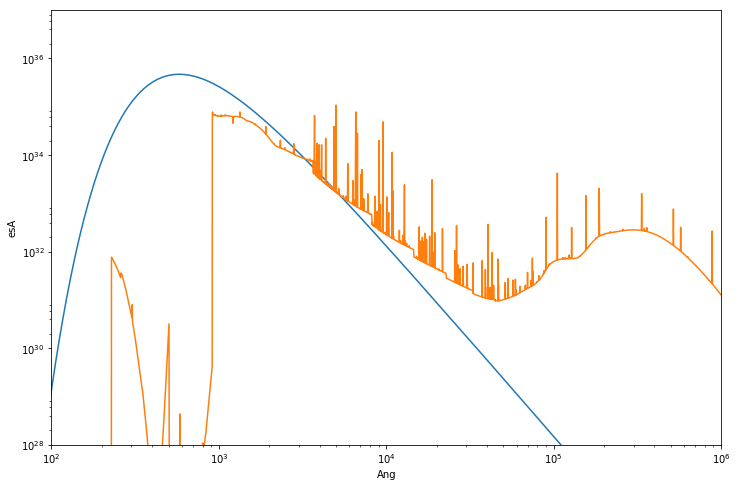

In [21]:
f, ax = plt.subplots(figsize=(12,8))
M.plot_spectrum(cont='incid', ax=ax, xunit='Ang', yunit='esA')
M.plot_spectrum(cont='ntrans', ax=ax, xunit='Ang', yunit='esA')
ax.set_xlim((100, 1000000))
ax.set_ylim((1e28, 1e37))

<IPython.core.display.Javascript object>


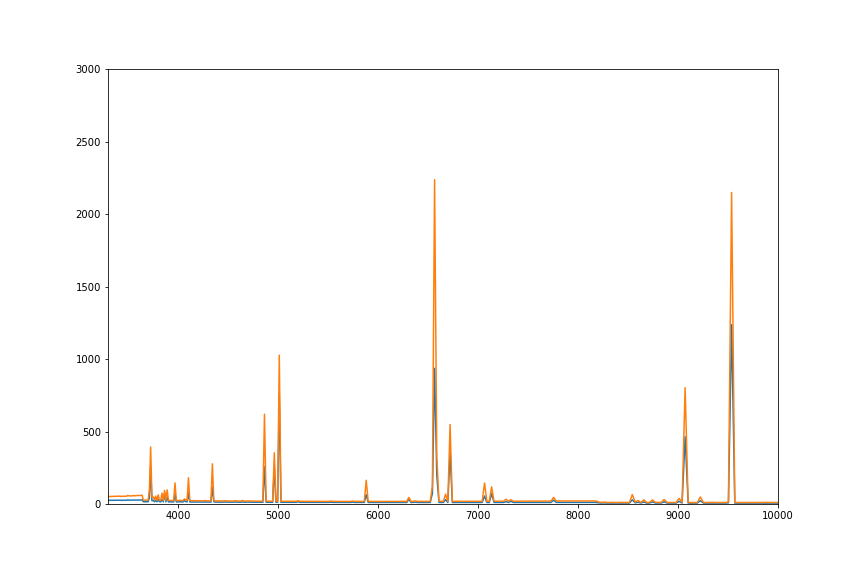

In [32]:
%matplotlib notebook
f, ax = plt.subplots(figsize=(12,8))
# The ylog option requires pyCloudy version >=0.8.50
#M.plot_spectrum(cont='ntrans', ax=ax, xunit='Ang', xlog=False, ylog=False)
ax.plot(M.get_cont_x(unit='Ang'), M.get_cont_y(cont='ntrans', unit='Jy'))
ax.plot(Md.get_cont_x(unit='Ang'), Md.get_cont_y(cont='ntrans', unit='Jy'))
ax.set_xlim((3300, 10000))
ax.set_ylim((0, 3000))
plt.show()

### Compute an identical model but ionized by a WMbasic model atmopshere with log g = 4.

##### We download the wmbasic file into the Cloudy data directory from http://data.nublado.org/stars/wmbasic.ascii.gz We then compile the file to Cloudy's format by doing: 

##### These files must be in the directory where the models will be run

In [42]:
! mv ../Data/wmbasic.mod ../../Models

##### We ask cloudy wich SEDs are available (do this from the directory where the models are run).

##### We ask cloudy what combination of parameters for a given SED grid are available.

In [35]:
! cd ../data ; echo "table star wmbasic list" | cloudy.exe


                               This is a beta release of Cloudy, and is intended for testing only.
Please help make Cloudy better by posing problems or suggestions on http://tech.groups.yahoo.com/group/cloudy_simulations/.

                                                Cloudy 17.00 beta 1 (prerelease)
                                                         www.nublado.org

                       **************************************17Jan01**************************************
                       *                                                                                 *
                       * table star wmbasic list                                                         *

subgrid for log(Z)=-0.3:

  Teff\log(g) |      2.75         3       3.2       3.4       3.6       3.8         4       4.1       4.2
--------------|------------------------------------------------------------------------------------------
        25000 |        --        --        --        --     

In [39]:
# We de fine the models to be run with the appropriate values of the WMbasic parameters.
def make_mod_WM(name):
    NH = 250
    fr = 0.03
    R_in, Q0 = get_R_in_Q0(logU=-2, fr=fr, NH=NH)
    c_input = pc.CloudyInput('{0}/{1}'.format(models_dir, name))
    c_input.set_star(SED='table star wmbasic', SED_params=(50000, 4, 0),
                     lumi_unit = 'q(H)', lumi_value = np.log10(Q0))
    c_input.set_cste_density(np.log10(NH))
    c_input.set_radius(r_in = np.log10(R_in))
    c_input.set_abund(predef='ism', nograins=False)
    c_input.set_distance(dist=1., unit='kpc', linear=True)
    c_input.set_other(options)
    c_input.set_stop(('temperature off', 'pfrac 0.02'))
    c_input.print_input()
    c_input.run_cloudy()

In [40]:
name = 'M6_21'

In [43]:
make_mod_WM(name)

In [44]:
M_WM = pc.CloudyModel('{0}/{1}'.format(models_dir, name), read_emis=False)

<IPython.core.display.Javascript object>


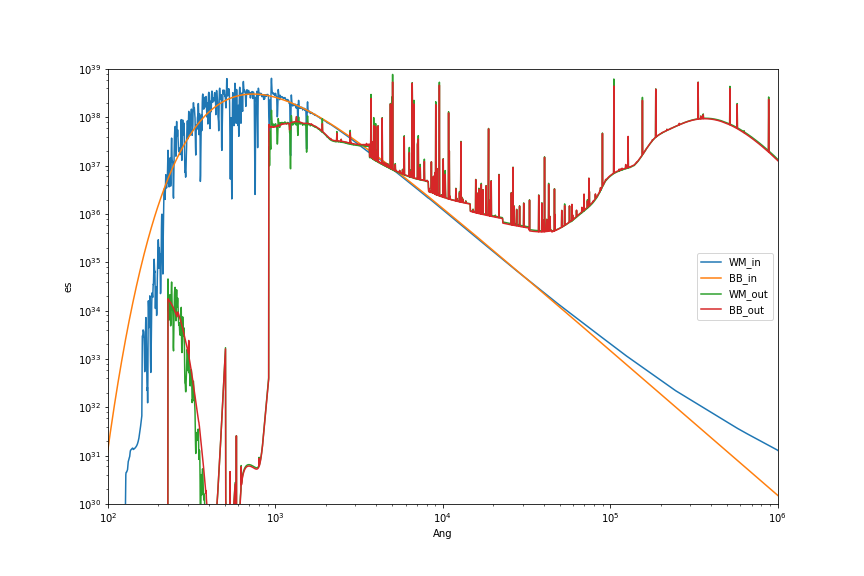

In [45]:
f, ax = plt.subplots(figsize=(12,8))
M_WM.plot_spectrum(cont='incid', ax=ax, xunit='Ang', label='WM_in')
M.plot_spectrum(cont='incid', ax=ax, xunit='Ang', label='BB_in')
M_WM.plot_spectrum(cont='ntrans', ax=ax, xunit='Ang', label='WM_out')
M.plot_spectrum(cont='ntrans', ax=ax, xunit='Ang', label='BB_out')
ax.set_xlim((1e2, 1e6))
ax.set_ylim((1e30, 1e39))
ax.legend(loc='best')

##### We overplot the spectra obtained with a Planck function and with the WMBasic code.

<IPython.core.display.Javascript object>


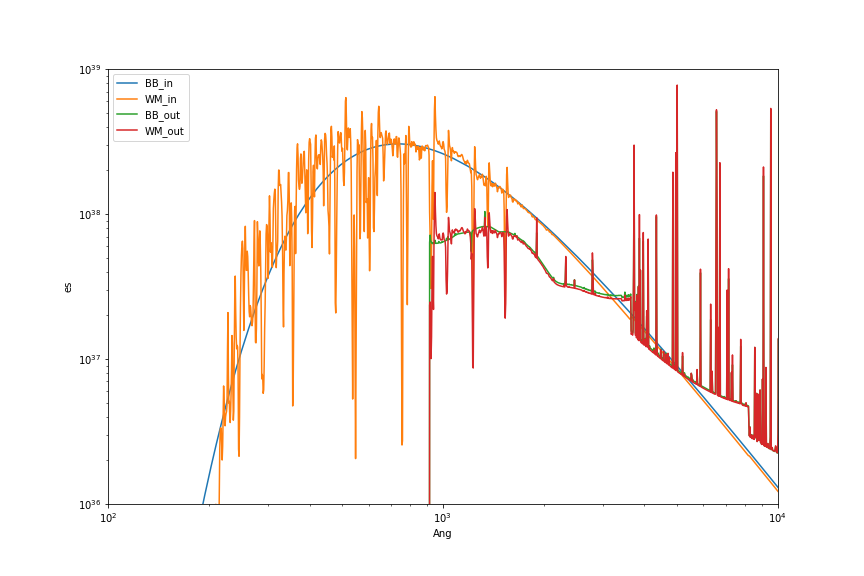

In [46]:
f, ax = plt.subplots(figsize=(12,8))
M.plot_spectrum(cont='incid', ax=ax, xunit='Ang', label='BB_in')
M_WM.plot_spectrum(cont='incid', ax=ax, xunit='Ang', label='WM_in')
M.plot_spectrum(cont='ntrans', ax=ax, xunit='Ang', label='BB_out')
M_WM.plot_spectrum(cont='ntrans', ax=ax, xunit='Ang', label='WM_out')
ax.set_xlim((100, 10000))
ax.set_ylim((1e36, 1e39))
ax.legend(loc='best')

### Plot the values of $Q(E)$, the number of stellar photons above energy $E$, for the two spectral energy distributions considered

<IPython.core.display.Javascript object>


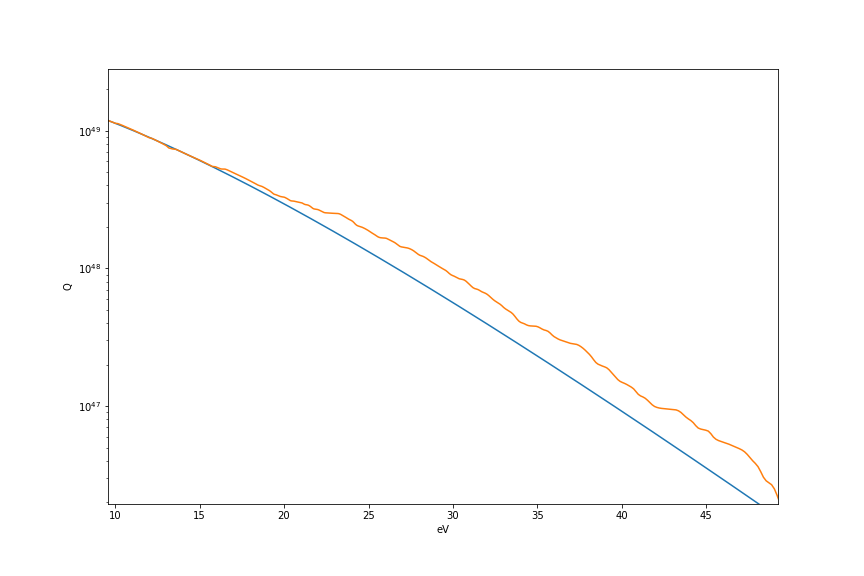

(10, 100)

In [47]:
f, ax = plt.subplots(figsize=(12,8))
M.plot_spectrum(cont='incid', ax=ax, xunit='eV', yunit='Q', xlog=False)
M_WM.plot_spectrum(cont='incid', ax=ax, xunit='eV', yunit='Q', xlog=False)
ax.set_xlim((10, 100))


###  Compare the ionization structures of He,N,O,Ne,S,Ar for these two models, by plotting the ionic abundances as a function of fractional radius. 

<IPython.core.display.Javascript object>


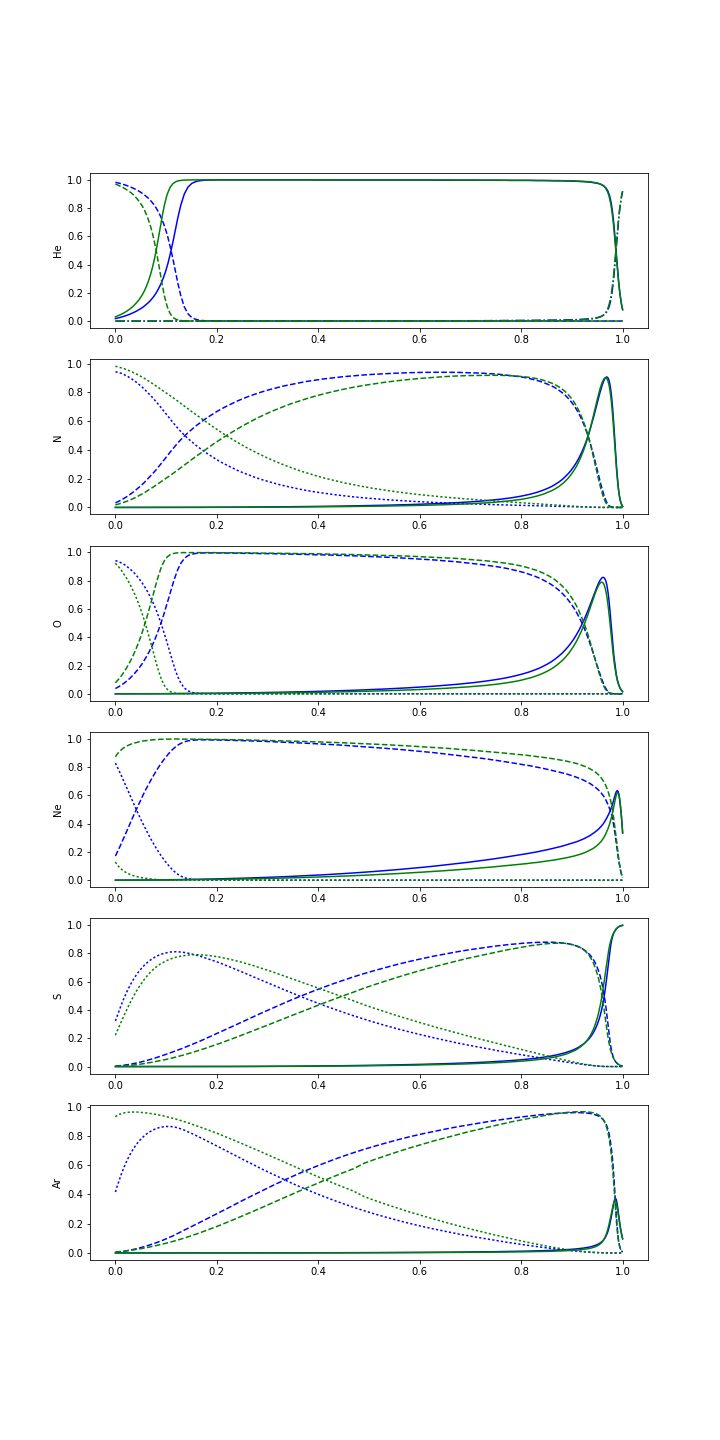

In [48]:
f, axes = plt.subplots(6, 1, figsize=(10,20))
axes[0].plot(M.depth_full/M.thickness_full, M.get_ionic('He', 0), 'b-.')
axes[0].plot(M.depth_full/M.thickness_full, M.get_ionic('He', 1), 'b-')
axes[0].plot(M.depth_full/M.thickness_full, M.get_ionic('He', 2), 'b--')
axes[0].plot(M_WM.depth_full/M_WM.thickness_full, M_WM.get_ionic('He', 0), 'g-.')
axes[0].plot(M_WM.depth_full/M_WM.thickness_full, M_WM.get_ionic('He', 1), 'g-')
axes[0].plot(M_WM.depth_full/M_WM.thickness_full, M_WM.get_ionic('He', 2), 'g--')
axes[0].set_ylabel('He')

axes[1].plot(M.depth_full/M.thickness_full, M.get_ionic('N', 1), 'b-')
axes[1].plot(M.depth_full/M.thickness_full, M.get_ionic('N', 2), 'b--')
axes[1].plot(M.depth_full/M.thickness_full, M.get_ionic('N', 3), 'b:')
axes[1].plot(M_WM.depth_full/M_WM.thickness_full, M_WM.get_ionic('N', 1), 'g-')
axes[1].plot(M_WM.depth_full/M_WM.thickness_full, M_WM.get_ionic('N', 2), 'g--')
axes[1].plot(M_WM.depth_full/M_WM.thickness_full, M_WM.get_ionic('N', 3), 'g:')
axes[1].set_ylabel('N')

axes[2].plot(M.depth_full/M.thickness_full, M.get_ionic('O', 1), 'b-')
axes[2].plot(M.depth_full/M.thickness_full, M.get_ionic('O', 2), 'b--')
axes[2].plot(M.depth_full/M.thickness_full, M.get_ionic('O', 3), 'b:')
axes[2].plot(M_WM.depth_full/M_WM.thickness_full, M_WM.get_ionic('O', 1), 'g-')
axes[2].plot(M_WM.depth_full/M_WM.thickness_full, M_WM.get_ionic('O', 2), 'g--')
axes[2].plot(M_WM.depth_full/M_WM.thickness_full, M_WM.get_ionic('O', 3), 'g:')
axes[2].set_ylabel('O')

axes[3].plot(M.depth_full/M.thickness_full, M.get_ionic('Ne', 1), 'b-')
axes[3].plot(M.depth_full/M.thickness_full, M.get_ionic('Ne', 2), 'b--')
axes[3].plot(M.depth_full/M.thickness_full, M.get_ionic('Ne', 3), 'b:')
axes[3].plot(M_WM.depth_full/M_WM.thickness_full, M_WM.get_ionic('Ne', 1), 'g-')
axes[3].plot(M_WM.depth_full/M_WM.thickness_full, M_WM.get_ionic('Ne', 2), 'g--')
axes[3].plot(M_WM.depth_full/M_WM.thickness_full, M_WM.get_ionic('Ne', 3), 'g:')
axes[3].set_ylabel('Ne')

axes[4].plot(M.depth_full/M.thickness_full, M.get_ionic('S', 1), 'b-')
axes[4].plot(M.depth_full/M.thickness_full, M.get_ionic('S', 2), 'b--')
axes[4].plot(M.depth_full/M.thickness_full, M.get_ionic('S', 3), 'b:')
axes[4].plot(M_WM.depth_full/M_WM.thickness_full, M_WM.get_ionic('S', 1), 'g-')
axes[4].plot(M_WM.depth_full/M_WM.thickness_full, M_WM.get_ionic('S', 2), 'g--')
axes[4].plot(M_WM.depth_full/M_WM.thickness_full, M_WM.get_ionic('S', 3), 'g:')
axes[4].set_ylabel('S')

axes[5].plot(M.depth_full/M.thickness_full, M.get_ionic('Ar', 1), 'b-')
axes[5].plot(M.depth_full/M.thickness_full, M.get_ionic('Ar', 2), 'b--')
axes[5].plot(M.depth_full/M.thickness_full, M.get_ionic('Ar', 3), 'b:')
axes[5].plot(M_WM.depth_full/M_WM.thickness_full, M_WM.get_ionic('Ar', 1), 'g-')
axes[5].plot(M_WM.depth_full/M_WM.thickness_full, M_WM.get_ionic('Ar', 2), 'g--')
axes[5].plot(M_WM.depth_full/M_WM.thickness_full, M_WM.get_ionic('Ar', 3), 'g:')
axes[5].set_ylabel('Ar')

### ??? Comments

In [ ]:
# the following is to have the nice style in the Notebook.
# Don't remove this.
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()